## Tech Challenge

In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Lendo as bases de dados

In [112]:
df_vinhos = pd.read_csv('ExportacaoVinhos.csv', encoding='utf-8', sep=',')

In [113]:
df_producao = pd.read_csv('ProducaoVinho.csv')

In [114]:
# https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?downloadformat=csv
df_PIBs = pd.read_csv('PIBs.csv', encoding='utf-8', decimal='.')

In [115]:
# https://br.investing.com/currencies/usd-brl-historical-data
df_valorizacao_real = pd.read_csv('ValorizacaoRealAnual.csv', decimal='.')

In [116]:
# https://data.worldbank.org/indicator/SP.POP.TOTL?downloadformat=csv
df_dados_demograficos = pd.read_csv('DadosDemograficos.csv', encoding='utf-8')

In [117]:
# https://berkeleyearth.org/data/
df_dados_climaticos = pd.read_csv('DadosClimaticos.csv')

In [118]:
# https://bdmep.inmet.gov.br/
df_dados_climaticos_caxias_do_sul = pd.read_csv('DadosClimaticosCaxiasDoSul.csv')

## 1. Análise geral por ano

In [119]:
volume_por_ano = df_vinhos.groupby('ANO')['QUANTIDADE'].sum() / 1_000_000

1.1 Volume total exportado por ano

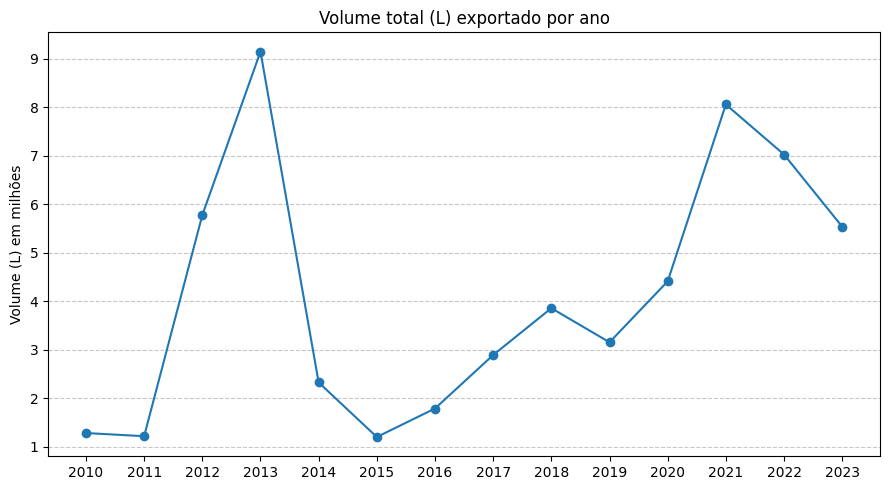

In [120]:
plt.figure(figsize=(9, 5))
volume_por_ano.plot(marker='o')

ax = plt.gca()
ax.set_xticks(sorted(df_vinhos['ANO'].unique()))

plt.title('Volume total (L) exportado por ano')
plt.xlabel(None)
plt.ylabel('Volume (L) em milhões')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Em 2012, o governo brasileiro implementou o Prêmio de Escoamento da Produção (PEP), uma medida excepcional destinada a regular os estoques de vinho no país.

In [121]:
display(df_vinhos[df_vinhos['ANO'] == 2012][['ANO', 'PAIS', 'QUANTIDADE']].sort_values(by='QUANTIDADE', ascending=False).head(3))
display(df_vinhos[df_vinhos['ANO'] == 2013][['ANO', 'PAIS', 'QUANTIDADE']].sort_values(by='QUANTIDADE', ascending=False).head(3))


,ANO,PAIS,QUANTIDADE
106,2012,Rússia,4528176
101,2012,Paraguai,354824
90,2012,França,195604


,ANO,PAIS,QUANTIDADE
144,2013,Rússia,5893291
126,2013,Espanha,1972980
139,2013,Paraguai,481564


Esses comunicado ajuda a entender também o aumento da exportação de vinho em 2013
https://www.infoteca.cnptia.embrapa.br/infoteca/bitstream/doc/992336/1/ComunicadoTecnico157.pdf

Em 2014, o Rio Grande do Sul, responsável por cerca de 90% da produção nacional de vinhos, enfrentou condições climáticas extremas. O inverno foi excepcionalmente rigoroso, seguido por um verão com temperaturas recordes, o que atrasou o ciclo das videiras em 15 a 20 dias. Além disso, a ocorrência de granizos e geadas entre novembro e janeiro afetou significativamente a produção. Como resultado, estimou-se uma redução de 20% na produção de vinhos nacionais, com algumas regiões enfrentando perdas de até 60%.

Fonte: https://www.estadao.com.br/paladar/bebida/clima-extremo-reduz-safra-2014/

Obs: Análise mais aprofundada sobre o clima do RS na seção de Relação com o Clima

In [122]:
(volume_por_ano.pct_change() * 100).round(2)

ANO
2010       NaN
2011     -5.13
2012    375.40
2013     58.41
2014    -74.60
2015    -48.43
2016     49.07
2017     61.74
2018     33.45
2019    -18.24
2020     39.86
2021     82.74
2022    -12.82
2023    -21.18
Name: QUANTIDADE, dtype: float64

In [123]:
df_producao.set_index('ANO', inplace=True)

In [124]:
producao_por_ano = df_producao.groupby('ANO')['PRODUCAO'].sum() / 1_000_000

1.2 Produção de vinhos de mesa por ano

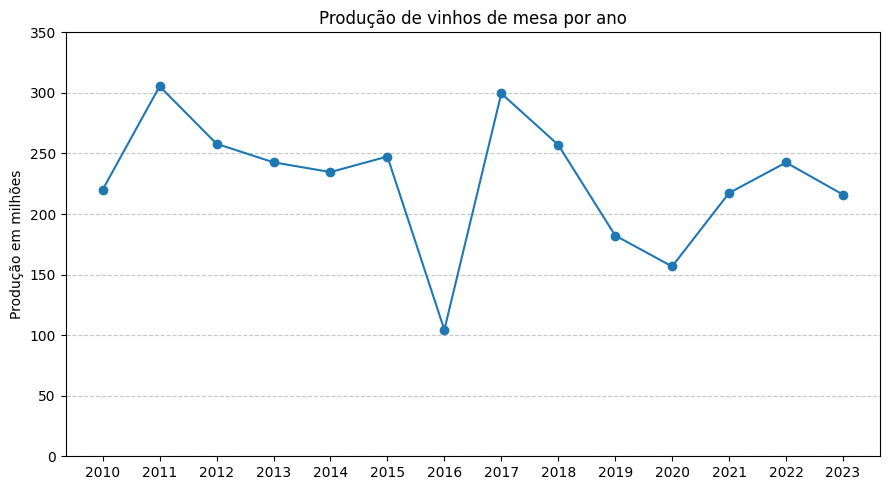

In [125]:
plt.figure(figsize=(9, 5))
producao_por_ano.plot(marker='o')

ax = plt.gca()
ax.set_xticks(sorted(df_producao.index))

plt.title('Produção de vinhos de mesa por ano')
plt.xlabel(None)
plt.ylabel('Produção em milhões')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 350)
plt.tight_layout()
plt.show()

In [126]:
(producao_por_ano.pct_change() * 100).round(2)

ANO
2010       NaN
2011     38.79
2012    -15.54
2013     -5.93
2014     -3.32
2015      5.46
2016    -57.82
2017    186.96
2018    -14.18
2019    -29.11
2020    -14.01
2021     38.71
2022     11.58
2023    -10.93
Name: PRODUCAO, dtype: float64

Fenômeno El Niño explica a queda na produção de vinho em 2016: O El Niño intensificou as chuvas e a umidade durante o ciclo das videiras, afetando negativamente a floração, a fecundação e a maturação das uvas.  

Chuvas excessivas na primavera: Os meses de setembro, outubro e novembro registraram precipitações bem acima do normal, prejudicando a fecundação das flores e favorecendo o surgimento de doenças nos cachos, o que levou à queda da produção.  
fonte: https://www.embrapa.br/busca-de-noticias/-/noticia/9103859/artigo-safra-da-uva-2016----o-que-esta-acontecendo  

Obs: Análise mais aprofundada sobre o clima do RS na seção de Relação com o Clima

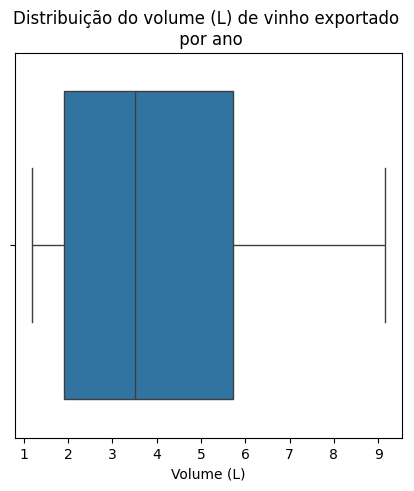

In [127]:
plt.figure(figsize=(5,5))
sns.boxplot(x=volume_por_ano)
plt.title('Distribuição do volume (L) de vinho exportado \n por ano')
plt.xlabel('Volume (L)')
plt.show()

In [128]:
valor_por_ano = df_vinhos.groupby('ANO')['VALOR'].sum() / 1_000_000

1.3 Valor total das exportações de vinho por ano

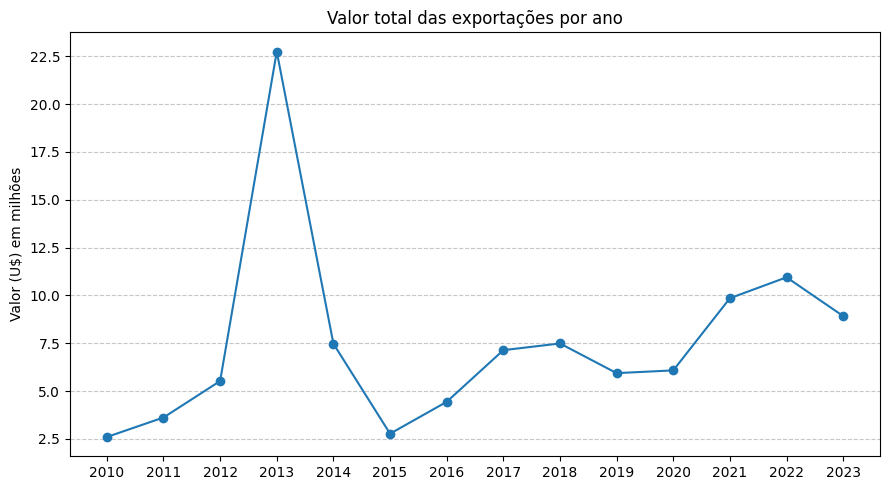

In [129]:
plt.figure(figsize=(9, 5))
valor_por_ano.plot(marker='o')

ax = plt.gca()
ax.set_xticks(sorted(df_vinhos['ANO'].unique()))

plt.title('Valor total das exportações por ano')
plt.xlabel(None)
plt.ylabel('Valor (U$) em milhões')
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

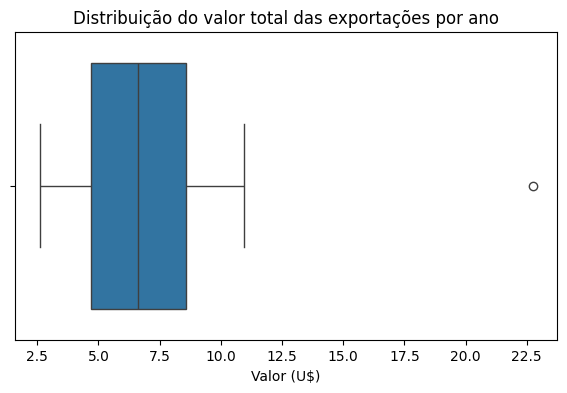

In [130]:
plt.figure(figsize=(7,4))
sns.boxplot(x=valor_por_ano)
plt.title('Distribuição do valor total das exportações por ano')
plt.xlabel('Valor (U$)')
plt.show()

In [131]:
df_vinhos_2013 = df_vinhos[(df_vinhos['ANO'].isin([2013]))]

In [132]:
df_vinhos_2013.set_index('PAIS', inplace=True)

In [133]:
pct_importacao_2013 = ((df_vinhos_2013['QUANTIDADE'] / df_vinhos_2013['QUANTIDADE'].sum()) * 100).round(2)

In [134]:
pct_importacao_2013.sort_values(ascending=False).head()

PAIS
Rússia            64.41
Espanha           21.56
Paraguai           5.26
Estados Unidos     2.68
Japão              1.01
Name: QUANTIDADE, dtype: float64

In [135]:
df_vinhos_2013.loc['Rússia']

QUANTIDADE     5893291
VALOR         14795694
ANO               2013
CONTINENTE        Ásia
COD_PAIS           RUS
Name: Rússia, dtype: object

In [136]:
df_russia = df_vinhos[df_vinhos['PAIS'] == 'Rússia']

In [137]:
df_russia.set_index('ANO', inplace=True)

In [138]:
df_russia['VALOR_LITRO'] = (df_russia['VALOR'] / df_russia['QUANTIDADE']).round(2)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_14016\195140051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_russia['VALOR_LITRO'] = (df_russia['VALOR'] / df_russia['QUANTIDADE']).round(2)


In [139]:
(df_russia['VALOR_LITRO'].pct_change() * 100).round(2)

ANO
2012        NaN
2013     445.65
2014     -87.25
2015      18.75
2020    1436.84
2021     -70.55
2022       4.65
Name: VALOR_LITRO, dtype: float64

In [140]:
# Calcula o primeiro e o terceiro quartil
Q1 = valor_por_ano.quantile(0.25)
Q3 = valor_por_ano.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
outliers = valor_por_ano[(valor_por_ano < limite_inferior) | (valor_por_ano > limite_superior)]

outliers

ANO
2013    22.744845
Name: VALOR, dtype: float64

In [141]:
df_merged = pd.DataFrame({'QUANTIDADE': volume_por_ano, 'VALOR': valor_por_ano, 'ANO': volume_por_ano.index})

1.4 Volume x Valor das Exportações de Vinho do Brasil (2010–2023)

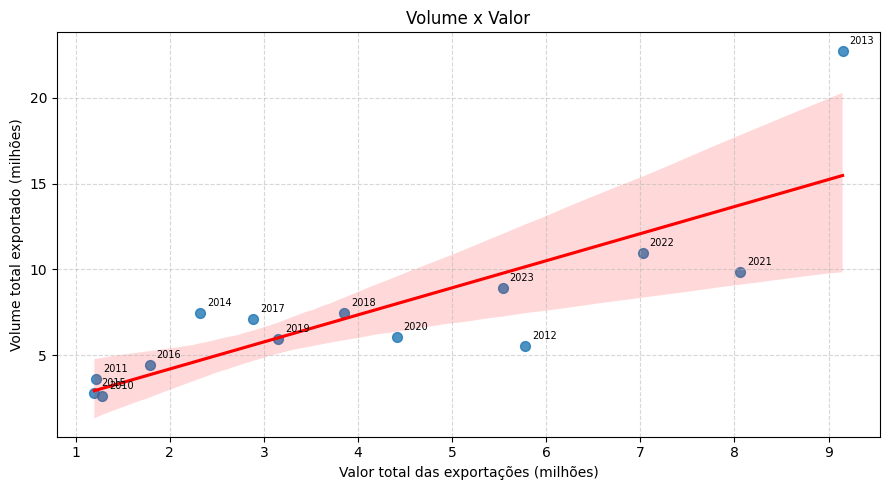

In [142]:
plt.figure(figsize=(9, 5))
sns.regplot(data=df_merged, x='QUANTIDADE', y='VALOR', scatter_kws={'s': 50}, line_kws={'color': 'red'})

for i in range(len(df_merged)):
    plt.annotate(df_merged['ANO'].iloc[i],
                 (df_merged['QUANTIDADE'].iloc[i], df_merged['VALOR'].iloc[i]),
                 textcoords="offset points", xytext=(5,5), ha='left', fontsize=7)

plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('Valor total das exportações (milhões)')
plt.ylabel('Volume total exportado (milhões)')
plt.title('Volume x Valor')
plt.tight_layout()
plt.show()

## 2. Análise geral por maiores importadores

In [143]:
volume_por_pais = df_vinhos.groupby('PAIS')['QUANTIDADE'].sum().sort_values(ascending=False)

In [144]:
# Calcula o primeiro e o terceiro quartil
Q1 = volume_por_pais.quantile(0.25)
Q3 = volume_por_pais.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
maiores_importadores = volume_por_pais[volume_por_pais > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Países que importam acima do limite superior \n{maiores_importadores}')

Limite superior: 178544.375

Países que importam acima do limite superior 
PAIS
Paraguai                   30316320
Rússia                     10909227
Estados Unidos              2976980
Haiti                       2346728
Espanha                     1988057
Reino Unido                 1120688
Uruguai                     1118688
China                       1021270
Japão                        754367
Holanda (Países Baixos)      726332
Alemanha                     423029
França                       308740
Bélgica                      273277
Cuba                         271044
Portugal                     243238
Curaçao                      216254
Venezuela                    196545
Bolívia                      181905
Name: QUANTIDADE, dtype: int64


In [145]:
maiores_importadores.sort_values(inplace=True)

2.1 Maiores importadores de vinho brasileiro

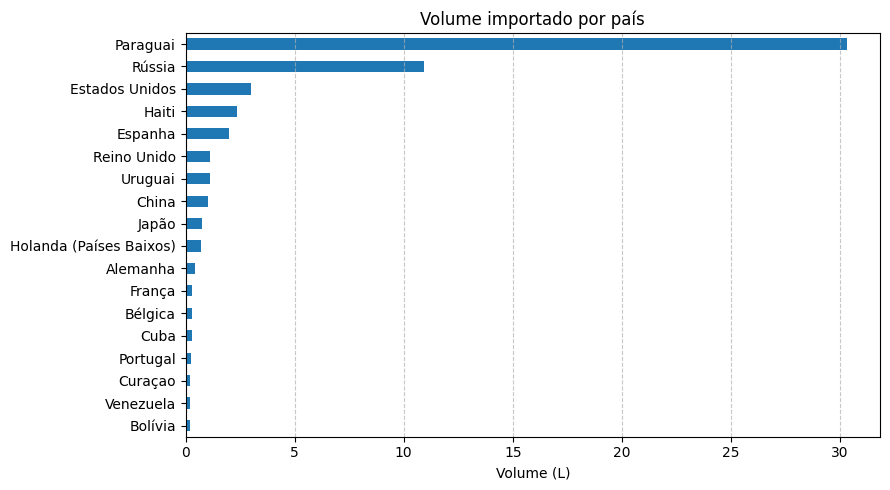

In [146]:
plt.figure(figsize=(9, 5))
(maiores_importadores / 1_000_000).plot(kind='barh')

plt.title('Volume importado por país')
plt.xlabel('Volume (L)')
plt.ylabel(None)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='y')
plt.tight_layout()
plt.show()

Principais fatores para o Paraguai ser o maior importador de vinho brasileiro:

**Proximidade geográfica e logística:** A fronteira compartilhada entre Brasil e Paraguai facilita o transporte e reduz os custos logísticos. A região da Tríplice Fronteira, que inclui Ciudad del Este, é um importante centro de comércio e distribuição, permitindo que os vinhos brasileiros cheguem rapidamente ao mercado paraguaio.  
fonte: https://pt.wikipedia.org/wiki/Tr%C3%ADplice_Fronteira_do_Igua%C3%A7u

**Acordos comerciais no âmbito do mercosul:** Ambos os países são membros do Mercosul, o que proporciona benefícios como a eliminação de tarifas alfandegárias para produtos originários dos países membros. Isso facilita a exportação de vinhos brasileiros para o Paraguai sem a incidência de impostos de importação, tornando-os mais acessíveis aos consumidores paraguaios.  
fonte: https://pt.wikipedia.org/wiki/Tratado_de_Assun%C3%A7%C3%A3o

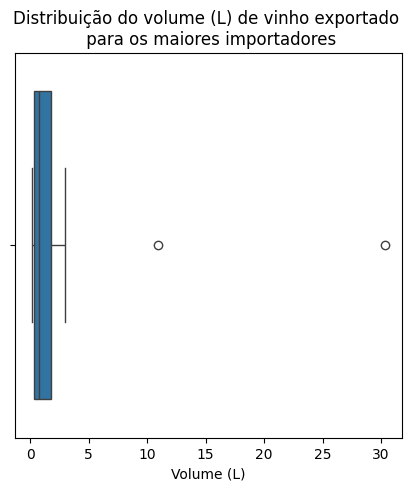

In [147]:
plt.figure(figsize=(5,5))
sns.boxplot(x=maiores_importadores / 1_000_000)
plt.title('Distribuição do volume (L) de vinho exportado \n para os maiores importadores')
plt.xlabel('Volume (L)')
plt.show()

In [148]:
pctg_maiores_importadores = ((maiores_importadores * 100) / maiores_importadores.sum()).round(1)

In [149]:
pctg_maiores_importadores

PAIS
Bolívia                     0.3
Venezuela                   0.4
Curaçao                     0.4
Portugal                    0.4
Cuba                        0.5
Bélgica                     0.5
França                      0.6
Alemanha                    0.8
Holanda (Países Baixos)     1.3
Japão                       1.4
China                       1.8
Uruguai                     2.0
Reino Unido                 2.0
Espanha                     3.6
Haiti                       4.2
Estados Unidos              5.4
Rússia                     19.7
Paraguai                   54.7
Name: QUANTIDADE, dtype: float64

## 3. Análise dos valores por litro

In [150]:
soma_valor = df_vinhos.groupby('PAIS')['VALOR'].sum()
soma_qtd = df_vinhos.groupby('PAIS')['QUANTIDADE'].sum()
valor_por_litro = soma_valor / soma_qtd

In [151]:
# Em 2020 Camarões importou 0 litros e pagou U$178, 
# a divisão desses valores para calcular o valor 
# por litro gera uma linha com valor infinito.
# Substituiremos infinito por 0
valor_por_litro.replace(np.inf, 0, inplace=True)

3.1 Distribuição do valor (U$) do vinho por litro

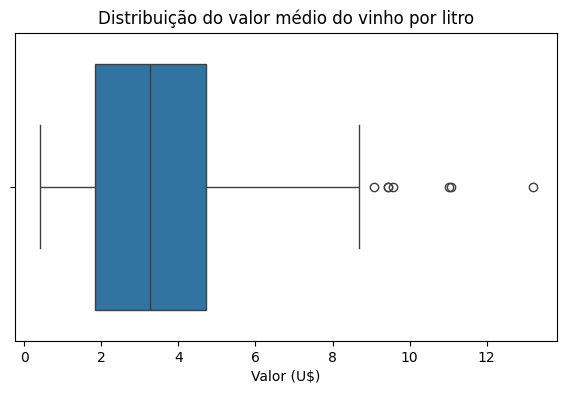

In [152]:
plt.figure(figsize=(7,4))
sns.boxplot(x=valor_por_litro)
plt.title('Distribuição do valor médio do vinho por litro')
plt.xlabel('Valor (U$)')
plt.show()

3.2 Países que pagam mais caro pelo litro do vinho

In [153]:
# Calcula o primeiro e o terceiro quartil
Q1 = valor_por_litro.quantile(0.25)
Q3 = valor_por_litro.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
valor_por_litro_paises_que_pagam_mais_caro = valor_por_litro[valor_por_litro > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Países que pagam acima do limite superior \n{valor_por_litro_paises_que_pagam_mais_caro.round(2)}')

Limite superior: 9.05631028107187

Países que pagam acima do limite superior 
PAIS
Bangladesh                11.08
Bermudas                   9.56
Bulgária                  13.20
Croácia                   11.04
Emirados Árabes Unidos     9.08
Letônia                    9.45
Mauritânia                 9.44
dtype: float64


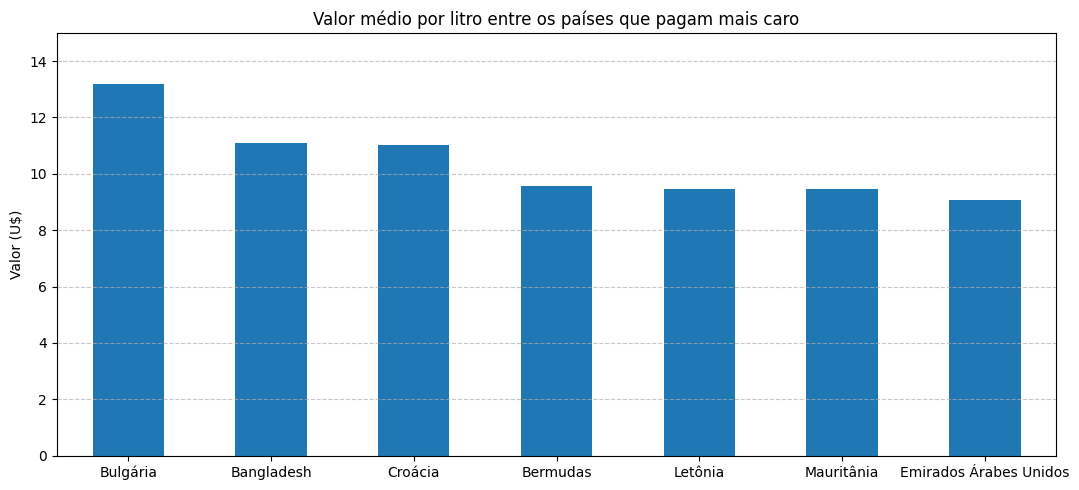

In [154]:
plt.figure(figsize=(11, 5))
(valor_por_litro_paises_que_pagam_mais_caro.sort_values(ascending=False)).plot(kind='bar')

plt.title('Valor médio por litro entre os países que pagam mais caro')
plt.xlabel(None)
plt.ylabel('Valor (U$)')
plt.xticks(rotation=360)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='x')
plt.ylim(0, 15)
plt.tight_layout()
plt.show()


In [155]:
df_paises_que_pagam_mais_caro_por_litro = df_vinhos[df_vinhos['PAIS'].isin(valor_por_litro_paises_que_pagam_mais_caro.index)]

In [156]:
volume_por_paises_que_pagam_mais_caro_por_litro = df_paises_que_pagam_mais_caro_por_litro.groupby('PAIS')['QUANTIDADE'].sum().sort_values(ascending=False)

3.3 Volume importado pelos países que pagam mais caro

In [157]:
volume_por_paises_que_pagam_mais_caro_por_litro

PAIS
Emirados Árabes Unidos    14894
Letônia                     395
Bulgária                    122
Croácia                      55
Bermudas                     16
Bangladesh                   12
Mauritânia                    9
Name: QUANTIDADE, dtype: int64

In [158]:
df_vinhos['VALOR_LITRO'] = (df_vinhos['VALOR'] / df_vinhos['QUANTIDADE']).round(2)

In [159]:
df_vinhos['VALOR_LITRO'].replace(np.inf, 0, inplace=True)

C:\Users\Guilh\AppData\Local\Temp\ipykernel_14016\1491416222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vinhos['VALOR_LITRO'].replace(np.inf, 0, inplace=True)


In [160]:
# Valor médio por litro pago e volume importado pelos Emirados Árabes Unidos
df_vinhos[df_vinhos['PAIS'] == 'Emirados Árabes Unidos'][['ANO', 'VALOR_LITRO', 'QUANTIDADE']]

,ANO,VALOR_LITRO,QUANTIDADE
11,2010,3.10,1035
49,2011,3.11,2120
86,2012,4.89,675
163,2014,5.28,640
199,2015,4.89,765
232,2016,4.72,585
265,2017,4.89,675
304,2018,4.89,360
361,2019,4.89,450
429,2020,3.92,581


In [161]:
valor_por_litro_maiores_importadores = valor_por_litro[valor_por_litro.index.isin(maiores_importadores.index)]

3.4 Valor por litro para os maiores importadores

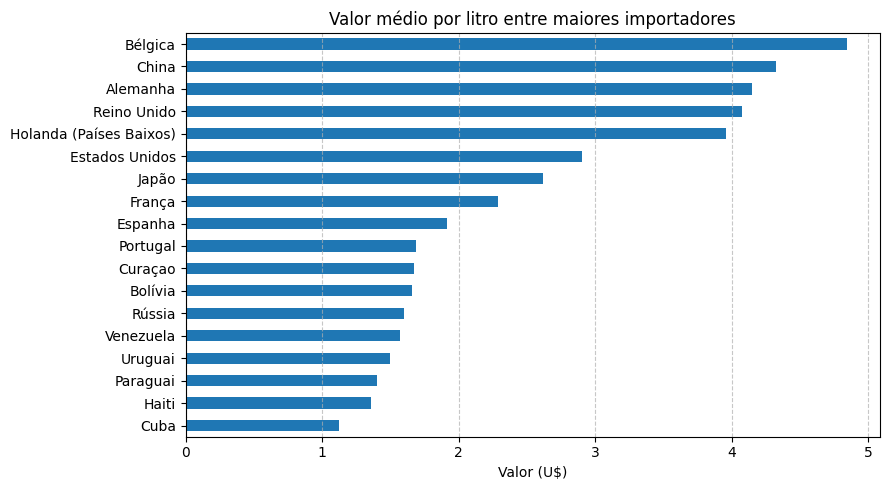

In [162]:
plt.figure(figsize=(9, 5))
(valor_por_litro_maiores_importadores.sort_values()).plot(kind='barh')

plt.title('Valor médio por litro entre maiores importadores')
plt.xlabel('Valor (U$)')
plt.ylabel(None)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='y')
plt.tight_layout()
plt.show()

In [163]:
(valor_por_litro_maiores_importadores.round(2)).sort_values(ascending=False)

PAIS
Bélgica                    4.85
China                      4.33
Alemanha                   4.15
Reino Unido                4.08
Holanda (Países Baixos)    3.96
Estados Unidos             2.91
Japão                      2.62
França                     2.29
Espanha                    1.91
Portugal                   1.69
Curaçao                    1.67
Bolívia                    1.66
Rússia                     1.60
Venezuela                  1.57
Uruguai                    1.50
Paraguai                   1.40
Haiti                      1.36
Cuba                       1.12
dtype: float64

In [164]:
maiores_importadores.sort_values(ascending=False)

PAIS
Paraguai                   30316320
Rússia                     10909227
Estados Unidos              2976980
Haiti                       2346728
Espanha                     1988057
Reino Unido                 1120688
Uruguai                     1118688
China                       1021270
Japão                        754367
Holanda (Países Baixos)      726332
Alemanha                     423029
França                       308740
Bélgica                      273277
Cuba                         271044
Portugal                     243238
Curaçao                      216254
Venezuela                    196545
Bolívia                      181905
Name: QUANTIDADE, dtype: int64

In [165]:
(valor_por_litro_maiores_importadores.mean()).round(2)

np.float64(2.48)

In [166]:
paises_que_pagam_mais_caro = valor_por_litro_maiores_importadores[valor_por_litro_maiores_importadores > 4]

In [167]:
valor_medio_por_litro_por_ano = (df_vinhos.groupby('ANO')['VALOR_LITRO'].mean()).round(2)

In [168]:
valor_medio_por_litro_por_ano

ANO
2010    4.25
2011    4.39
2012    5.89
2013    4.85
2014    4.94
2015    3.98
2016    5.13
2017    5.19
2018    3.69
2019    4.71
2020    3.55
2021    3.89
2022    4.90
2023    4.58
Name: VALOR_LITRO, dtype: float64

3.5 Valor médio do litro por ano

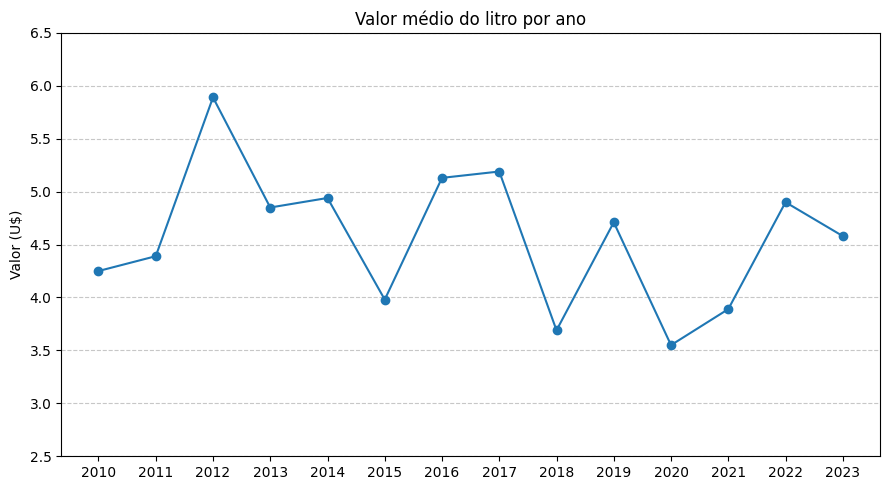

In [169]:
plt.figure(figsize=(9, 5))
valor_medio_por_litro_por_ano.plot(marker='o')

ax = plt.gca()
ax.set_xticks(sorted(df_vinhos['ANO'].unique()))

plt.title('Valor médio do litro por ano')
plt.xlabel(None)
plt.ylabel('Valor (U$)')
plt.xticks(rotation=360)
plt.ylim(2.5, 6.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Para entender o aumento do valor médio de 2011 para 2012, vamos analisar se houve uma crescente nas importações dos países que pagam mais caro, se isso for uma verdade, o valor médio pode aumentar consideravelmente. Para isso vamos considerar que um aumento relevante seja de mais de 50%

In [170]:
df_vinhos_2011_2012 = df_vinhos[df_vinhos['ANO'].isin([2011, 2012])][['PAIS', 'ANO', 'QUANTIDADE']]

In [171]:
df_pivot = df_vinhos_2011_2012.groupby(['PAIS', 'ANO'])['QUANTIDADE'].sum().unstack()

In [172]:
df_pivot['VAR_%'] = df_pivot.pct_change(axis=1)[2012] * 100

C:\Users\Guilh\AppData\Local\Temp\ipykernel_14016\344435522.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pivot['VAR_%'] = df_pivot.pct_change(axis=1)[2012] * 100


In [173]:
variacao_pct = (df_pivot['VAR_%'].sort_values(ascending=False)).round(2)

In [174]:
variacao_pct[variacao_pct > 50]

PAIS
Portugal     49554.74
Nigéria      11842.59
Estônia        638.00
Austrália      157.30
Polônia         84.65
Suécia          64.84
China           62.32
Name: VAR_%, dtype: float64

In [175]:
df_china = df_vinhos[df_vinhos['PAIS'] == 'China']

In [176]:
df_china.set_index('ANO', inplace=True)

In [177]:
df_china

,PAIS,QUANTIDADE,VALOR,CONTINENTE,COD_PAIS,VALOR_LITRO
ANO,,,,,,
2010,China,795,2358,Ásia,CHN,2.97
2011,China,54156,334867,Ásia,CHN,6.18
2012,China,87905,642177,Ásia,CHN,7.31
2013,China,40929,279956,Ásia,CHN,6.84
2014,China,64040,455340,Ásia,CHN,7.11
2015,China,47609,222866,Ásia,CHN,4.68
2016,China,134106,499622,Ásia,CHN,3.73
2017,China,67594,266086,Ásia,CHN,3.94
2018,China,30835,126336,Ásia,CHN,4.10


In [178]:
(df_china['VALOR_LITRO'].pct_change() * 100).round(2)

ANO
2010       NaN
2011    108.08
2012     18.28
2013     -6.43
2014      3.95
2015    -34.18
2016    -20.30
2017      5.63
2018      4.06
2019    -29.27
2020      2.41
2021     43.77
2022    -10.07
2023    -35.42
Name: VALOR_LITRO, dtype: float64

3.6 Elasticidade entre Valor por litro e Volume exportado

In [179]:
df_ano = df_vinhos.groupby("ANO").agg({
    "VALOR_LITRO": "mean",
    "QUANTIDADE": "sum"
}).reset_index()

In [180]:
# Calcular as variações percentuais
df_ano["PCT_VAR_PRECO"] = (df_ano["VALOR_LITRO"].pct_change() * 100).round(2)
df_ano["PCT_VAR_QTD"] = (df_ano["QUANTIDADE"].pct_change() * 100).round(2)

In [181]:
# Calcular elasticidade
df_ano["ELASTICIDADE"] = (df_ano["PCT_VAR_QTD"] / df_ano["PCT_VAR_PRECO"]).round(2)

In [182]:
print(df_ano[["ANO", "VALOR_LITRO", "QUANTIDADE", "ELASTICIDADE"]])


     ANO  VALOR_LITRO  QUANTIDADE  ELASTICIDADE
0   2010     4.251515     1280574           NaN
1   2011     4.388049     1214834         -1.60
2   2012     5.886500     5775376         10.99
3   2013     4.851389     9149059         -3.32
4   2014     4.937632     2324029        -41.91
5   2015     3.980000     1198479          2.50
6   2016     5.127273     1786549          1.70
7   2017     5.194412     2889572         47.13
8   2018     3.688214     3856162         -1.15
9   2019     4.708254     3152845         -0.66
10  2020     3.551268     4409706         -1.62
11  2021     3.890833     8058517          8.65
12  2022     4.904189     7025796         -0.49
13  2023     4.578514     5537437          3.19


E < -1: Demanda elástica → pequena variação no preço causa grande impacto na quantidade  
-1 < E < 0: Demanda inelástica → quantidade varia pouco, mesmo com mudança no preço  
E = 0: Demanda perfeitamente inelástica (teórico)  
E > 0: Comportamento anômalo (possivelmente influenciado por outros fatores externos)  

| Ano  | Elasticidade | Interpretação                                                                                                                                        |
| ---- | ------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| 2011 | -1.60        | **Elástica**: queda no volume sensível a aumento de preço                                                                                            |
| 2012 | 10.99        | **Comportamento anômalo**: aumento no preço e volume — pode indicar **eventos externos** (ex: acordo comercial, quebra de safra em concorrente etc.) |
| 2014 | -41.96       | Extremamente elástica: queda acentuada no volume apesar de leve aumento no preço — pode indicar **forte sensibilidade ou crise**                     |
| 2017 | 47.15        | Grande aumento de volume com preço praticamente estável — **efeito externo** forte (talvez promoção, isenção de tarifa etc.)                         |
| 2018 | -1.15        | Levemente elástica: volume caiu um pouco mesmo com queda no preço                                                                                    |
| 2019 | -0.66        | **Inelástica**: volume caiu pouco mesmo com aumento do preço                                                                                         |
| 2021 | 8.65         | Forte aumento de volume mesmo com leve aumento no preço — pode ser impulsionado por **aumento da demanda externa** pós-pandemia                      |
| 2022 | -0.49        | Inelástica: volume caiu mesmo com aumento de preço, mas variação foi moderada                                                                        |
| 2023 | 3.19         | Aumento de volume apesar de queda no preço — comportamento razoável                                                                                  |

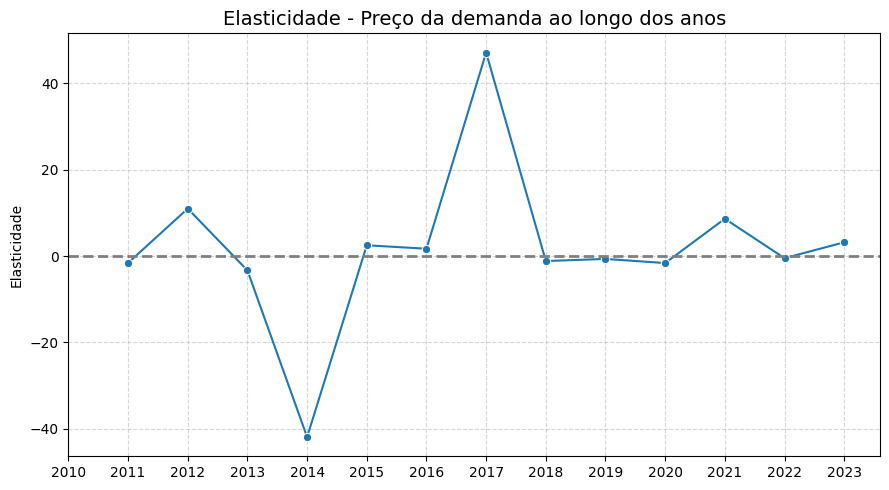

In [183]:
# Tamanho da figura
plt.figure(figsize=(9, 5))

# Plota a elasticidade ao longo dos anos
sns.lineplot(data=df_ano, x='ANO', y='ELASTICIDADE', marker='o')

# Linha horizontal no zero para referência
plt.axhline(0, color='gray', linestyle='--', linewidth=2)

# Título e rótulos
plt.title('Elasticidade - Preço da demanda ao longo dos anos', fontsize=14)
plt.xlabel(None)
plt.ylabel('Elasticidade')
plt.xticks(df_ano['ANO'], rotation=360)
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Exibe o gráfico
plt.tight_layout()
plt.show()


## 4. Correlações com indicadores macroeconômicos

In [184]:
df_PIBs = pd.melt(
    df_PIBs, 
    id_vars=['PAIS', 'COD_PAIS'], 
    var_name='ANO', 
    value_name='PIB'
)

# Removendo o prefixo 'ANO_' e transformando em inteiro
df_PIBs['ANO'] = df_PIBs['ANO'].str.replace('ANO_', '').astype(int)

In [185]:
df_dados_demograficos = pd.melt(
    df_dados_demograficos, 
    id_vars=['PAIS', 'COD_PAIS'], 
    var_name='ANO', 
    value_name='POPULACAO'
)

# Removendo o prefixo 'ANO_' e transformando em inteiro
df_dados_demograficos['ANO'] = df_dados_demograficos['ANO'].str.replace('ANO_', '').astype(int)

In [186]:
df_merged = df_vinhos.merge(df_PIBs[['COD_PAIS', 'ANO', 'PIB']], on=['COD_PAIS', 'ANO'])
df_merged = df_merged.merge(df_dados_demograficos[['COD_PAIS', 'ANO', 'POPULACAO']], on=['COD_PAIS', 'ANO'])

In [187]:
df_merged

,PAIS,QUANTIDADE,VALOR,ANO,CONTINENTE,COD_PAIS,VALOR_LITRO,PIB,POPULACAO
0,Alemanha,27715,138666,2010,Europa,DEU,5.00,3.468154e+12,81776930.0
1,Angola,33557,189891,2010,África,AGO,5.66,8.379947e+10,23294825.0
2,Austrália,1823,17960,2010,Oceania,AUS,9.85,1.148838e+12,22031750.0
3,Bahamas,3175,12759,2010,América Central,BHS,4.02,1.009576e+10,367478.0
4,Bélgica,42532,185411,2010,Europa,BEL,4.36,4.815565e+11,10895586.0
...,...,...,...,...,...,...,...,...,...
666,Togo,14550,25235,2023,África,TGO,1.73,9.171262e+09,9304337.0
667,Turquia,28104,95421,2023,Ásia,TUR,3.40,1.118253e+12,85325965.0
668,Uruguai,326093,454271,2023,América do Sul,URY,1.39,7.724083e+10,3388081.0
669,Venezuela,141030,220512,2023,América do Sul,VEN,1.56,NaN,28300854.0


In [188]:
maiores_economias = df_merged.groupby('PAIS')['PIB'].mean().sort_values(ascending=False)

In [189]:
maiores_densidades_demograficas = df_merged.groupby('PAIS')['POPULACAO'].mean().sort_values(ascending=False)

In [190]:
# Calcula o primeiro e o terceiro quartil
Q1 = maiores_economias.quantile(0.25)
Q3 = maiores_economias.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
maiores_economias = maiores_economias[maiores_economias > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Maiores economias \n{maiores_economias}')

Limite superior: 1072984123071.5833

Maiores economias 
PAIS
Estados Unidos    1.993306e+13
China             1.237015e+13
Japão             5.104524e+12
Alemanha          3.884012e+12
Índia             3.119750e+12
Reino Unido       2.861489e+12
França            2.728860e+12
Itália            2.103371e+12
Rússia            1.932284e+12
Brasil            1.811286e+12
Canadá            1.803383e+12
Coreia do Sul     1.675133e+12
Austrália         1.439192e+12
Espanha           1.432462e+12
México            1.337301e+12
Indonésia         1.215113e+12
Name: PIB, dtype: float64


In [191]:
# Calcula o primeiro e o terceiro quartil
Q1 = maiores_densidades_demograficas.quantile(0.25)
Q3 = maiores_densidades_demograficas.quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
maiores_densidades_demograficas = maiores_densidades_demograficas[maiores_densidades_demograficas > limite_superior]

print(f'Limite superior: {limite_superior}\n')

print(f'Maiores densidades demográficas \n{maiores_densidades_demograficas}')

Limite superior: 81197402.5

Maiores densidades demográficas 
PAIS
Índia             1.413869e+09
China             1.385196e+09
Estados Unidos    3.232213e+08
Indonésia         2.780025e+08
Brasil            2.099284e+08
Nigéria           2.029570e+08
Bangladesh        1.677806e+08
Rússia            1.443273e+08
Japão             1.267479e+08
México            1.246183e+08
Filipinas         1.123846e+08
Vietnã            9.654819e+07
Irã               8.856773e+07
Turquia           8.368797e+07
Alemanha          8.215941e+07
Name: POPULACAO, dtype: float64


4.1 Maiores economias entre os maiores importadores

In [192]:
maiores_importadores_economicamente = list(set(maiores_economias.index) & set(maiores_importadores.index))
print(f'{len(maiores_importadores_economicamente)} das maiores economias estão entre os {len(maiores_importadores)} maiores importadores')
for pais in maiores_importadores_economicamente:
    print(pais)

8 das maiores economias estão entre os 18 maiores importadores
Alemanha
Estados Unidos
França
Rússia
Espanha
Reino Unido
Japão
China


4.2 Maiores densidades demográficas entre os maiores importadores

In [193]:
maiores_importadores_demograficamente = list(set(maiores_densidades_demograficas.index) & set(maiores_densidades_demograficas.index))
print(f'{len(maiores_importadores_demograficamente)} dos países mais densos estão entre os {len(maiores_importadores)} maiores importadores')
for pais in maiores_importadores_demograficamente:
    print(pais)

15 dos países mais densos estão entre os 18 maiores importadores
Alemanha
Bangladesh
Filipinas
Irã
Estados Unidos
Indonésia
Brasil
México
China
Turquia
Índia
Rússia
Nigéria
Japão
Vietnã


4.3 Economia vs Importação

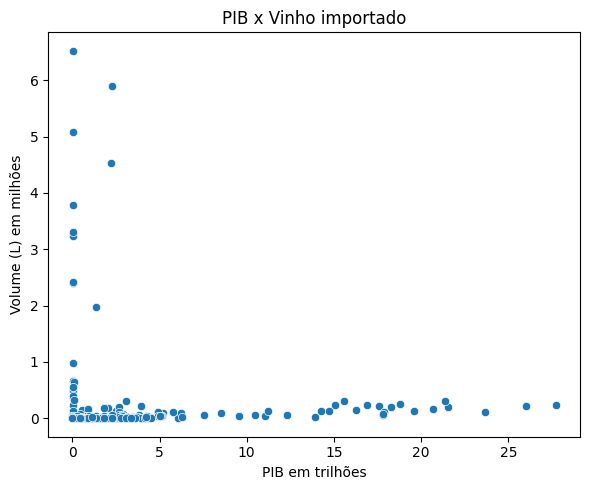

In [194]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_merged[df_merged['PAIS'].isin(maiores_importadores_economicamente)], x=df_merged['PIB'] / 1_000_000_000_000, y=df_merged['QUANTIDADE'] / 1_000_000)
plt.xlabel('PIB em trilhões')
plt.ylabel('Volume (L) em milhões')
plt.title('PIB x Vinho importado')
plt.tight_layout()
plt.show()

In [195]:
df_merged['PIB'].corr(df_merged['QUANTIDADE']).round(4)

np.float64(0.0283)

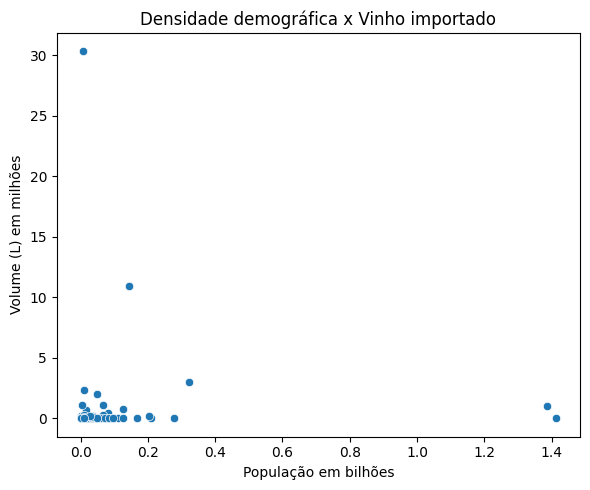

In [196]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_merged[df_merged['PAIS'].isin(maiores_importadores_economicamente)], x=df_merged.groupby('PAIS')['POPULACAO'].mean() / 1_000_000_000, y=df_merged.groupby('PAIS')['QUANTIDADE'].sum() / 1_000_000)
plt.xlabel('População em bilhões')
plt.ylabel('Volume (L) em milhões')
plt.title('Densidade demográfica x Vinho importado')
plt.tight_layout()
plt.show()

In [197]:
df_merged['POPULACAO'].corr(df_merged['QUANTIDADE']).round(4)

np.float64(0.0033)

In [198]:
# Calcula o primeiro e o terceiro quartil
Q1 = df_merged['PIB'].quantile(0.25)
Q3 = df_merged['PIB'].quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
outliers_PIB = df_merged[df_merged['PIB'] > limite_superior]

outliers_PIB = outliers_PIB['PAIS'].unique()

print(f'Limite superior: {limite_superior}\n')

print(f'\n{outliers_PIB}')

Limite superior: 2484321908950.5


['Alemanha' 'China' 'Estados Unidos' 'França' 'Japão' 'Reino Unido'
 'Índia']


In [199]:
# Calcula o primeiro e o terceiro quartil
Q1 = df_merged['POPULACAO'].quantile(0.25)
Q3 = df_merged['POPULACAO'].quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
outliers_populacao = df_merged[df_merged['POPULACAO'] > limite_superior]

outliers_populacao = outliers_populacao['PAIS'].unique()

print(f'Limite superior: {limite_superior}\n')

print(f'\n{outliers_populacao}')

Limite superior: 120623475.5


['China' 'Estados Unidos' 'Japão' 'Nigéria' 'Rússia' 'México' 'Índia'
 'Bangladesh' 'Indonésia' 'Brasil']


In [200]:
# Calcula o primeiro e o terceiro quartil
Q1 = df_merged['QUANTIDADE'].quantile(0.25)
Q3 = df_merged['QUANTIDADE'].quantile(0.75)

# Calcula o intervalo interquartil (IQR)
IQR = Q3 - Q1

# Define limites inferior e superior
limite_superior = Q3 + (1.5 * IQR)

# Identifica os outliers
outliers_importacao = df_merged[df_merged['QUANTIDADE'] > limite_superior]

outliers_importacao = outliers_importacao['PAIS'].unique()

print(f'Limite superior: {limite_superior}\n')

print(f'\n{outliers_importacao}')

Limite superior: 34596.25


['Bélgica' 'Estados Unidos' 'Japão' 'Holanda (Países Baixos)' 'Paraguai'
 'Reino Unido' 'Alemanha' 'China' 'França' 'Portugal' 'Rússia' 'Espanha'
 'Finlândia' 'Canadá' 'Cuba' 'Haiti' 'Curaçao' 'Nigéria' 'Uruguai' 'Gana'
 'Libéria' 'Peru' 'Venezuela']


In [201]:
outliers_PIB = list(outliers_PIB)
outliers_populacao = list(outliers_populacao)
outliers_importacao = list(outliers_importacao)

In [202]:
outliers_PIB = outliers_PIB + outliers_importacao
outliers_populacao = outliers_populacao + outliers_importacao

In [203]:
df_merged_sem_outliers_economia = df_merged[~df_merged['PAIS'].isin(outliers_PIB)]

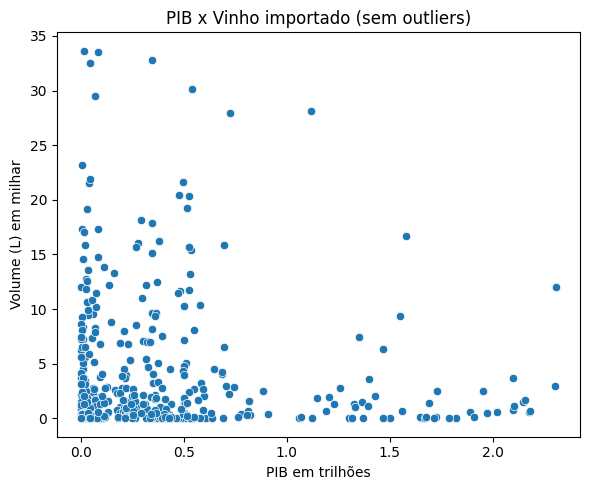

In [204]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_merged_sem_outliers_economia, x=df_merged_sem_outliers_economia['PIB'] / 1_000_000_000_000, y=df_merged_sem_outliers_economia['QUANTIDADE'] / 1_000)
plt.xlabel('PIB em trilhões')
plt.ylabel('Volume (L) em milhar')
plt.title('PIB x Vinho importado (sem outliers)')
plt.tight_layout()
plt.show()

In [205]:
df_merged_sem_outliers_economia['PIB'].corr(df_merged_sem_outliers_economia['QUANTIDADE']).round(4)

np.float64(-0.062)

In [206]:
df_merged_sem_outliers_populacao = df_merged[~df_merged['PAIS'].isin(outliers_populacao)]

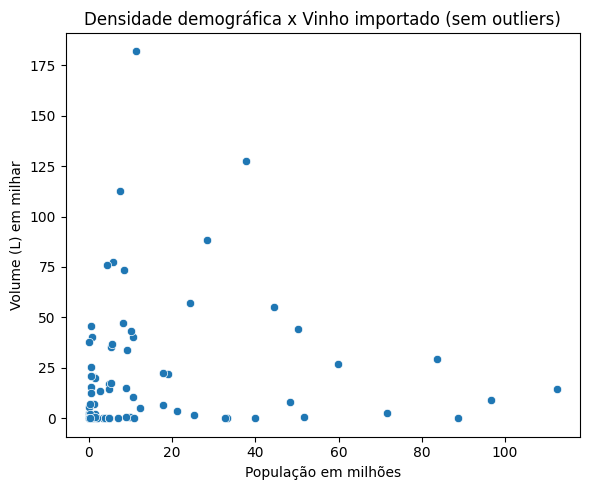

In [207]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_merged_sem_outliers_populacao, x=df_merged_sem_outliers_populacao.groupby('PAIS')['POPULACAO'].mean() / 1_000_000, y=df_merged_sem_outliers_populacao.groupby('PAIS')['QUANTIDADE'].sum() / 1_000)
plt.xlabel('População em milhões')
plt.ylabel('Volume (L) em milhar')
plt.title('Densidade demográfica x Vinho importado (sem outliers)')
plt.tight_layout()
plt.show()

In [208]:
df_merged_sem_outliers_populacao['POPULACAO'].corr(df_merged_sem_outliers_populacao['QUANTIDADE']).round(4)

np.float64(-0.0013)

Com base na análise econômica realizada ao longo dos últimos 14 anos, constatou-se que o Produto Interno Bruto (PIB) dos países não exerce influência estatisticamente significativa sobre o volume de vinho importado. Isso indica que economias com maior PIB não importam, necessariamente, quantidades mais elevadas da bebida.

In [209]:
media_economia_anual = df_merged.groupby('ANO')['PIB'].sum()
soma_importacao_anual = df_merged.groupby('ANO')['QUANTIDADE'].sum()

In [210]:
df_importacao_economia_anual = pd.DataFrame({'PIB': media_economia_anual, 'QTD_IMPORTADA': soma_importacao_anual})
df_importacao_economia_anual

,PIB,QTD_IMPORTADA
ANO,,
2010,4.330947e+13,1270764
2011,5.089793e+13,1202999
2012,5.505086e+13,5766129
2013,5.720491e+13,9137778
2014,5.924725e+13,2307055
2015,5.233530e+13,1184619
2016,5.546459e+13,1752941
2017,5.586451e+13,2869184
2018,6.877372e+13,3848573


4.3 Economia mundial e volume importado ao longo dos anos

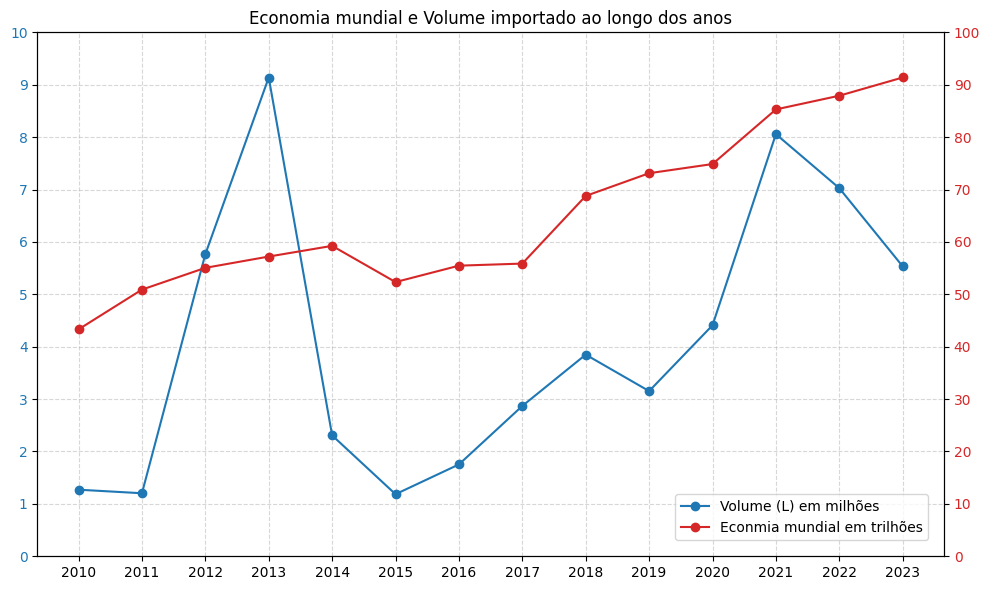

In [211]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(df_importacao_economia_anual.index, 
         df_importacao_economia_anual['QTD_IMPORTADA'] / 1_000_000, 
         label='Volume (L) em milhões', color='tab:blue', marker='o')
ax1.set_xlabel(None)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_ylim(0, 10)
ax1.set_yticks(range(0, 11, 1))

ax2 = ax1.twinx()
ax2.plot(df_importacao_economia_anual.index, 
         df_importacao_economia_anual['PIB'] / 1_000_000_000_000, 
         label='Econmia mundial em trilhões', color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax2.set_ylim(0, 100)
ax2.set_yticks(range(0, 101, 10))

plt.title('Economia mundial e Volume importado ao longo dos anos')
plt.xticks(sorted(df_importacao_economia_anual.index), rotation=360)
ax1.grid(True, axis='both', linestyle='--', alpha=0.5)
fig.legend(loc='lower right', bbox_to_anchor=(0.94, 0.08))
fig.tight_layout()
plt.show()

Enquanto a economia global apresentou crescimento quase contínuo de 2010 a 2023, as exportações oscilaram fortemente, refletindo a influência de fatores específicos como preços, competitividade, acordos comerciais e eventos externos. Isso indica que o desempenho das exportações brasileiras de vinho está mais ligado a condições internas e estratégicas do setor do que à simples expansão econômica mundial.

In [212]:
df_valorizacao_real.set_index('ANO', inplace=True)

In [213]:
df_valorizacao_real_volume_exportado = pd.DataFrame({'VALOR': df_valorizacao_real['VALOR'], 'QTD_IMPORTADA': soma_importacao_anual})
df_valorizacao_real_volume_exportado

,VALOR,QTD_IMPORTADA
ANO,,
2010,1.758635,1270764
2011,1.673929,1202999
2012,1.954033,5766129
2013,2.158654,9137778
2014,2.353841,2307055
2015,3.335042,1184619
2016,3.482429,1752941
2017,3.192079,2869184
2018,3.654079,3848573


In [214]:
df_valorizacao_real_volume_exportado['VALOR'] = df_valorizacao_real_volume_exportado['VALOR'].round(2)

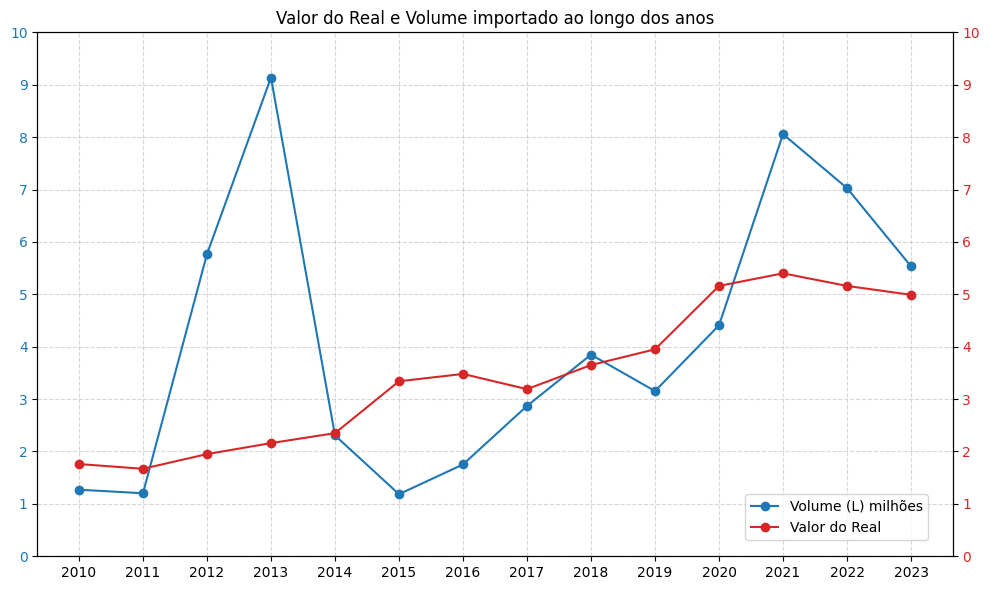

In [215]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(df_valorizacao_real_volume_exportado.index, 
         df_valorizacao_real_volume_exportado['QTD_IMPORTADA'] / 1_000_000, 
         label='Volume (L) milhões', color='tab:blue', marker='o')
ax1.set_xlabel(None)
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_ylim(0, 10)
ax1.set_yticks(range(0, 11, 1))

ax2 = ax1.twinx()
ax2.plot(df_valorizacao_real_volume_exportado.index, 
         df_valorizacao_real_volume_exportado['VALOR'], 
         label='Valor do Real', color='tab:red', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax2.set_ylim(0, 10)
ax2.set_yticks(range(0, 11, 1))

plt.title('Valor do Real e Volume importado ao longo dos anos')
plt.xticks(sorted(df_valorizacao_real_volume_exportado.index), rotation=360)
ax1.grid(True, axis='both', linestyle='--', alpha=0.5)
fig.legend(loc='lower right', bbox_to_anchor=(0.94, 0.08))
fig.tight_layout()
plt.show()

In [216]:
df_valorizacao_real_volume_exportado

,VALOR,QTD_IMPORTADA
ANO,,
2010,1.76,1270764
2011,1.67,1202999
2012,1.95,5766129
2013,2.16,9137778
2014,2.35,2307055
2015,3.34,1184619
2016,3.48,1752941
2017,3.19,2869184
2018,3.65,3848573


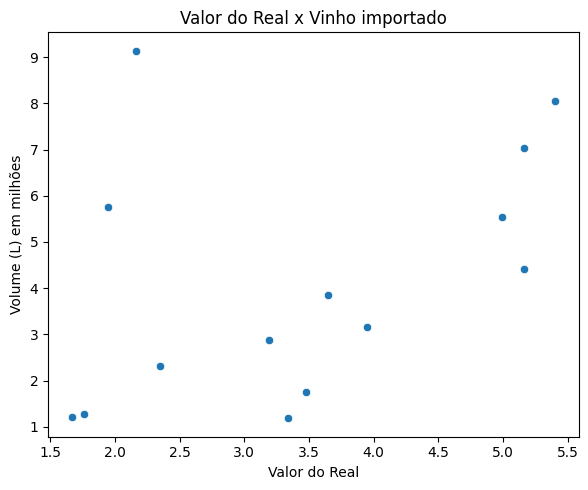

In [217]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_valorizacao_real_volume_exportado, x=df_valorizacao_real_volume_exportado['VALOR'], y=df_valorizacao_real_volume_exportado['QTD_IMPORTADA'] / 1_000_000)
plt.xlabel('Valor do Real')
plt.ylabel('Volume (L) em milhões')
plt.title('Valor do Real x Vinho importado')
plt.tight_layout()
plt.show()

In [218]:
df_valorizacao_real_volume_exportado

,VALOR,QTD_IMPORTADA
ANO,,
2010,1.76,1270764
2011,1.67,1202999
2012,1.95,5766129
2013,2.16,9137778
2014,2.35,2307055
2015,3.34,1184619
2016,3.48,1752941
2017,3.19,2869184
2018,3.65,3848573


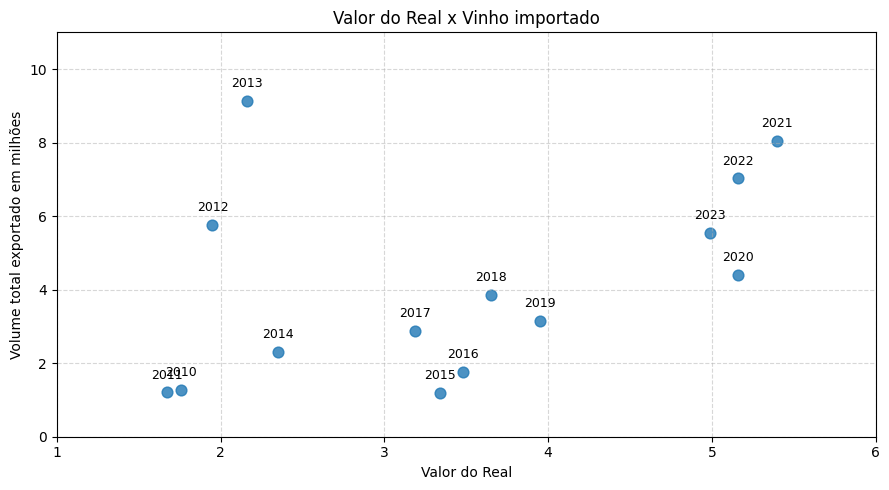

In [219]:
plt.figure(figsize=(9, 5))

# Corrigido: divide QTD_IMPORTADA por 1 milhão diretamente no plot
sns.regplot(data=df_valorizacao_real_volume_exportado,
            x='VALOR',
            y=df_valorizacao_real_volume_exportado['QTD_IMPORTADA'] / 1_000_000,
            fit_reg=False,
            scatter_kws={'s': 60})

# Loop correto para anotar os pontos
for i in range(len(df_valorizacao_real_volume_exportado)):
    plt.annotate(df_valorizacao_real_volume_exportado.index[i],
                 (df_valorizacao_real_volume_exportado['VALOR'].iloc[i],
                  df_valorizacao_real_volume_exportado['QTD_IMPORTADA'].iloc[i] / 1_000_000),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('Valor do Real')
plt.ylabel('Volume total exportado em milhões')
plt.title('Valor do Real x Vinho importado')
plt.ylim(0, 11)
plt.xlim(1, 6)
plt.tight_layout()
plt.show()


In [220]:
df_valorizacao_real_volume_exportado.reset_index(inplace=True)

In [221]:
df_valorizacao_real_volume_exportado['QTD_IMPORTADA'].corr(df_valorizacao_real_volume_exportado['VALOR']).round(4)

np.float64(0.3987)

A correlação de aproximadamente 0,3987 entre o valor médio anual do câmbio (USD/BRL) e a quantidade exportada de vinho indica uma relação positiva fraca. Isso sugere que, em anos em que o Real esteve mais desvalorizado (ou seja, o valor do dólar foi mais alto), houve uma tendência modesta de aumento nas exportações. Embora a associação não seja forte, ela aponta para uma possível influência do câmbio na competitividade do vinho brasileiro no mercado externo, alinhada à lógica de que um Real mais fraco torna o produto nacional mais barato para compradores estrangeiros.

## 5. Relação com o Clima

In [222]:
temp_media_paises = df_dados_climaticos.groupby('COD_PAIS')['TEMPERATURA_MEDIA'].mean().round(1)

In [223]:
df_temp_media_paises = temp_media_paises.to_frame().reset_index()

In [224]:
condicoes = [
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 10, # Frio
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 20, # Temperado
    df_temp_media_paises['TEMPERATURA_MEDIA'] < 26, # Quente
    df_temp_media_paises['TEMPERATURA_MEDIA'] >= 26 # Muito Quente
]

climas = ['Frio', 'Temperado', 'Quente', 'Muito Quente']

df_temp_media_paises['CLIMA'] = np.select(condicoes, climas, default='Não classificado')

In [225]:
df_temp_media_paises = df_temp_media_paises[~df_temp_media_paises['COD_PAIS'].isin(['PRY', 'RUS'])]

Calculando o total de vinho importado por clima

In [226]:
df_cruzado = df_merged.merge(df_temp_media_paises[['TEMPERATURA_MEDIA', 'CLIMA', 'COD_PAIS']], on='COD_PAIS', how='inner')

df_total_por_clima = df_cruzado.groupby('CLIMA')['QUANTIDADE'].sum().reset_index()

df_total_por_clima['PORCENTAGEM'] = (df_total_por_clima['QUANTIDADE'] * 100) / df_total_por_clima['QUANTIDADE'].sum()

df_total_por_clima.sort_values(by='QUANTIDADE', ascending=False, inplace=True)

df_total_por_clima.set_index('CLIMA', inplace=True)

df_total_por_clima['QTD_PAISES_CLIMA'] = df_temp_media_paises.groupby('CLIMA')['COD_PAIS'].count()

df_total_por_clima['PROPORCAO_POR_CLIMA'] = (df_total_por_clima['QUANTIDADE'] / df_total_por_clima['QTD_PAISES_CLIMA']).round(2)

In [227]:
df_total_por_clima

,QUANTIDADE,PORCENTAGEM,QTD_PAISES_CLIMA,PROPORCAO_POR_CLIMA
CLIMA,,,,
Frio,6217908,38.771807,16,388619.25
Temperado,5656147,35.268943,26,217544.12
Muito Quente,3482986,21.718183,41,84950.88
Quente,680148,4.241067,25,27205.92


5.1 Volume importado por clima

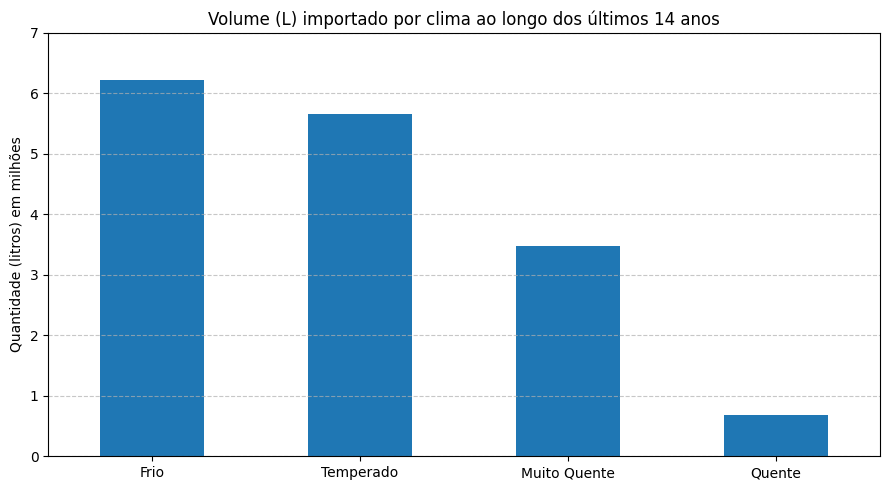

In [228]:
plt.figure(figsize=(9, 5))
(df_total_por_clima['QUANTIDADE'] / 1_000_000).plot(kind='bar')

plt.title('Volume (L) importado por clima ao longo dos últimos 14 anos')
plt.xlabel(None)
plt.ylabel('Quantidade (litros) em milhões')
plt.xticks(rotation=360)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='x')
plt.ylim(0, 7)
plt.tight_layout()
plt.show()

5.1.1 Volume importado por clima proporcionalmente

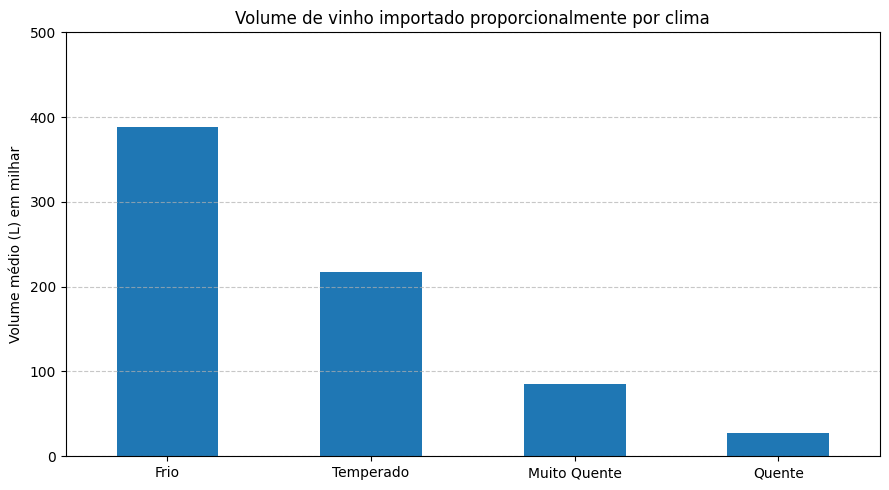

In [229]:
plt.figure(figsize=(9, 5))
(df_total_por_clima['PROPORCAO_POR_CLIMA'] / 1_000).plot(kind='bar')

plt.title('Volume de vinho importado proporcionalmente por clima')
plt.xlabel(None)
plt.ylabel('Volume médio (L) em milhar')
plt.xticks(rotation=360)
plt.grid(linestyle='--', alpha=0.7)
plt.grid(False, axis='x')
plt.ylim(0, 500)
plt.tight_layout()
plt.show()


In [230]:
df_clima_volume_importado = pd.merge(df_temp_media_paises, df_merged.groupby('COD_PAIS')['QUANTIDADE'].sum(), on='COD_PAIS')

5.2 Temperatura média vs Vinho importado

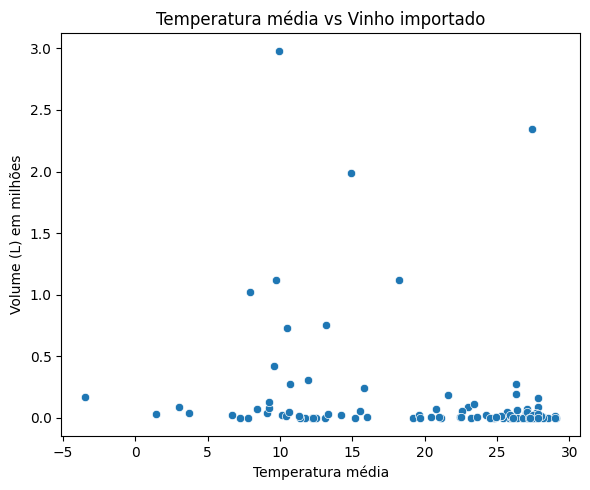

In [231]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_clima_volume_importado, x=df_clima_volume_importado['TEMPERATURA_MEDIA'], y=df_clima_volume_importado['QUANTIDADE'] / 1_000_000)
plt.xlabel('Temperatura média')
plt.ylabel('Volume (L) em milhões')
plt.title('Temperatura média vs Vinho importado')
plt.tight_layout()
plt.show()

In [232]:
df_clima_volume_importado_sem_outliers = df_clima_volume_importado[~df_clima_volume_importado['COD_PAIS'].isin(['PRY','RUS'])]

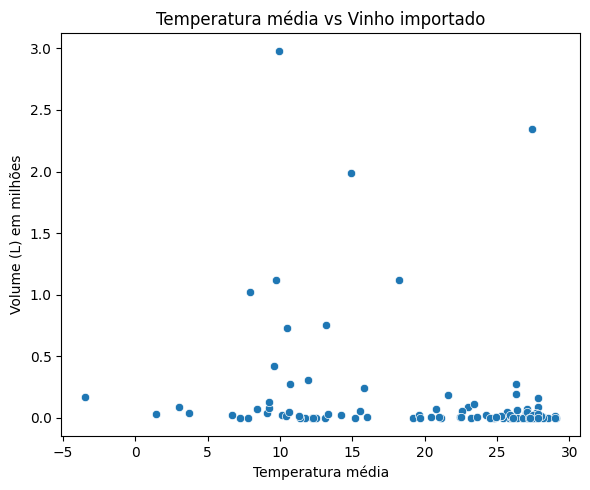

In [233]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_clima_volume_importado_sem_outliers, x=df_clima_volume_importado_sem_outliers['TEMPERATURA_MEDIA'], y=df_clima_volume_importado_sem_outliers['QUANTIDADE'] / 1_000_000)
plt.xlabel('Temperatura média')
plt.ylabel('Volume (L) em milhões')
plt.title('Temperatura média vs Vinho importado')
plt.tight_layout()
plt.show()

In [234]:
df_clima_volume_importado_sem_outliers['QUANTIDADE'].corr(df_clima_volume_importado_sem_outliers['TEMPERATURA_MEDIA']).round(4)

np.float64(-0.1979)

Com base na análise climática realizada, constatou-se que a temperatura média dos países não exerce influência estatisticamente significativa sobre o volume de vinho importado. Isso indica que países com temperatura mais alta ou mais baixa não importam, necessariamente, quantidades mais elevadas da bebida.

## Dados climáticos de Caxias do Sul

In [235]:
df_dados_climaticos_caxias_do_sul['DATA_MEDICAO'] = pd.to_datetime(df_dados_climaticos_caxias_do_sul['DATA_MEDICAO'])

In [236]:
veroes = df_dados_climaticos_caxias_do_sul[(df_dados_climaticos_caxias_do_sul['DATA_MEDICAO'].dt.month.isin([12, 1, 2]))]

In [237]:
veroes.set_index('DATA_MEDICAO', inplace=True)

In [238]:
variaveis_climaticas_verao = {}
anos = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for i, ano in zip(range(2, 40, 3), anos):
    # display(veroes.iloc[i:i+3])
    medias = round(veroes.iloc[i:i+3].mean(numeric_only=True), 1)
    variaveis_climaticas_verao[ano] = medias.to_dict()

In [239]:
df_veroes = pd.DataFrame.from_dict(variaveis_climaticas_verao, orient='index')

In [240]:
# Calcula a média para 2010 com base nos anos 2011, 2012
media_2010 = df_veroes.loc[[2011, 2012]].mean()

# Calcula a média para 2023 com base nos anos 2021, 2022
media_2023 = df_veroes.loc[[2021, 2022]].mean()

# Insere as novas linhas no DataFrame
df_veroes.loc[2010] = media_2010
df_veroes.loc[2023] = media_2023

# Ordena por índice (ano)
df_veroes = df_veroes.sort_index()

# Arredonda os valores com uma casa decimal
df_veroes = df_veroes.round(1)

In [241]:
# Seleciona todos os anos, exceto 2014
veroes_sem_2014 = df_veroes.loc[df_veroes.index != 2014]

# Calcula a média e o desvio padrão
medias = veroes_sem_2014.mean()
desvios = veroes_sem_2014.std()

# Ver o quanto 2014 foge da média (em desvios-padrão)
z_scores_2014 = (df_veroes.loc[2014] - medias) / desvios
z_scores_2014 = z_scores_2014.round(2)

In [242]:
labels_legiveis = {
    'INSOLACAO_TOTAL_H': 'Insolação Total (h)',
    'NEBULOSIDADE_MEDIA_DECIMOS': 'Nebulosidade (décimos)',
    'PRECIPITACAO_TOTAL_MM': 'Precipitação Total (mm)',
    'TEMP_MAX_MEDIA_C': 'Temp. Máxima Média (°C)',
    'TEMP_MEDIA_COMP_C': 'Temp. Média Comp. (°C)',
    'TEMP_MIN_MEDIA_C': 'Temp. Mínima Média (°C)',
    'UMIDADE_MEDIA_PCT': 'Umidade Média (%)'
}

z_scores_2014.index = z_scores_2014.index.map(labels_legiveis)

5.3 Desvios padrão de 2014 vs média dos outros anos (Ano em que as exportações caem drasticamente)

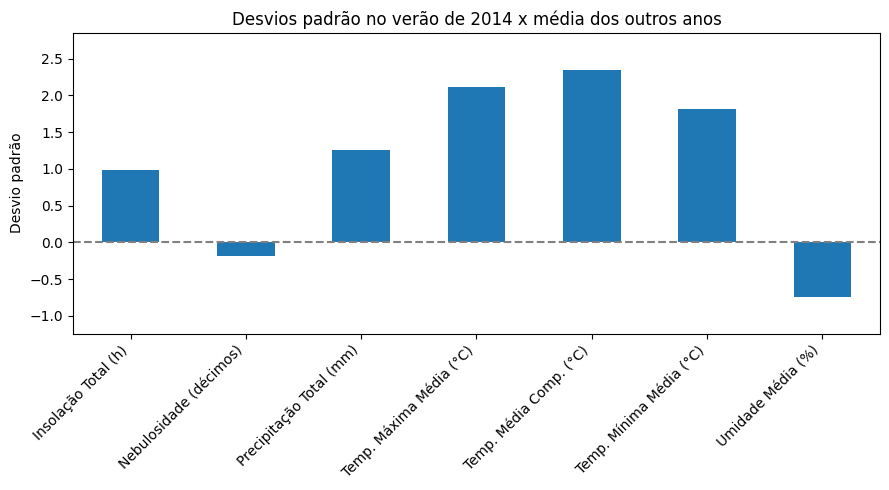

In [243]:
plt.figure(figsize=(9, 5))

z_scores_2014.plot(kind='bar', title='Desvios padrão no verão de 2014 x média dos outros anos')

plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Desvio padrão')
plt.xticks(rotation=45, ha='right')
plt.ylim(z_scores_2014.min() - 0.5, z_scores_2014.max() + 0.5)
plt.tight_layout()
plt.show()

In [244]:
z_scores_2014

Insolação Total (h)        0.99
Nebulosidade (décimos)    -0.19
Precipitação Total (mm)    1.25
Temp. Máxima Média (°C)    2.11
Temp. Média Comp. (°C)     2.35
Temp. Mínima Média (°C)    1.81
Umidade Média (%)         -0.74
dtype: float64

OBSERVAÇÃO: A safra de uvas destinadas à produção de vinho no Brasil, especialmente na região Sul, segue um ciclo anual que se inicia por volta de setembro, com a brotação na primavera, e se estende até a colheita, geralmente realizada entre janeiro e março do ano seguinte. Dessa forma, ao analisar os efeitos climáticos da primavera sobre a produção de um determinado ano-safra, é necessário considerar as condições climáticas ocorridas na primavera do ano anterior.

In [245]:
primaveras = df_dados_climaticos_caxias_do_sul[(df_dados_climaticos_caxias_do_sul['DATA_MEDICAO'].dt.month.isin([9, 10, 11]))]

In [246]:
primaveras.set_index('DATA_MEDICAO', inplace=True)

In [247]:
variaveis_climaticas_primavera = {}
anos = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for i, ano in zip(range(0, 40, 3), anos):
    # display(primaveras.iloc[i:i+3])
    medias = round(primaveras.iloc[i:i+3].mean(numeric_only=True), 1)
    variaveis_climaticas_primavera[ano] = medias.to_dict()

In [248]:
df_primaveras = pd.DataFrame.from_dict(variaveis_climaticas_primavera, orient='index')

In [249]:
df_primaveras.index = df_primaveras.index + 1

In [250]:
# Excluindo 2024, pois não usamos nessa análise
df_primaveras.drop(index=2024, inplace=True)

In [251]:
# Calcula a média para 2010 com base nos anos 2011, 2012
media_2010 = df_primaveras.loc[[2011, 2012]].mean()

# Insere a nova linhas no DataFrame
df_primaveras.loc[2010] = media_2010

# Ordena por índice (ano)
df_primaveras = df_primaveras.sort_index()

# Arredonda os valores com uma casa decimal
df_primaveras = df_primaveras.round(1)

In [252]:
variaveis_principais = [
    'PRECIPITACAO_TOTAL_MM',
    'NEBULOSIDADE_MEDIA_DECIMOS',
    'INSOLACAO_TOTAL_H'
]

# Seleciona todos os anos, exceto 2016, e filtra apenas as variáveis principais
primaveras_sem_2016 = df_primaveras.loc[df_primaveras.index != 2016, variaveis_principais]

# Calcula a média e o desvio padrão
medias = primaveras_sem_2016.mean()
desvios = primaveras_sem_2016.std()

# Calcula os z-scores para o ano de 2016, considerando apenas as variáveis principais
z_scores_2016 = (df_primaveras.loc[2016, variaveis_principais] - medias) / desvios
z_scores_2016 = z_scores_2016.round(2)

In [253]:
z_scores_2016

PRECIPITACAO_TOTAL_MM         2.25
NEBULOSIDADE_MEDIA_DECIMOS    4.83
INSOLACAO_TOTAL_H            -5.71
dtype: float64

In [254]:
labels_legiveis = {
    'INSOLACAO_TOTAL_H': 'Insolação Total (h)',
    'NEBULOSIDADE_MEDIA_DECIMOS': 'Nebulosidade (décimos)',
    'PRECIPITACAO_TOTAL_MM': 'Precipitação Total (mm)',
    'TEMP_MAX_MEDIA_C': 'Temp. Máxima Média (°C)',
    'TEMP_MEDIA_COMP_C': 'Temp. Média Comp. (°C)',
    'TEMP_MIN_MEDIA_C': 'Temp. Mínima Média (°C)',
    'UMIDADE_MEDIA_PCT': 'Umidade Média (%)'
}

z_scores_2016.index = z_scores_2016.index.map(labels_legiveis)

5.4 Desvios padrão na primavera de 2016 vs média dos outros anos

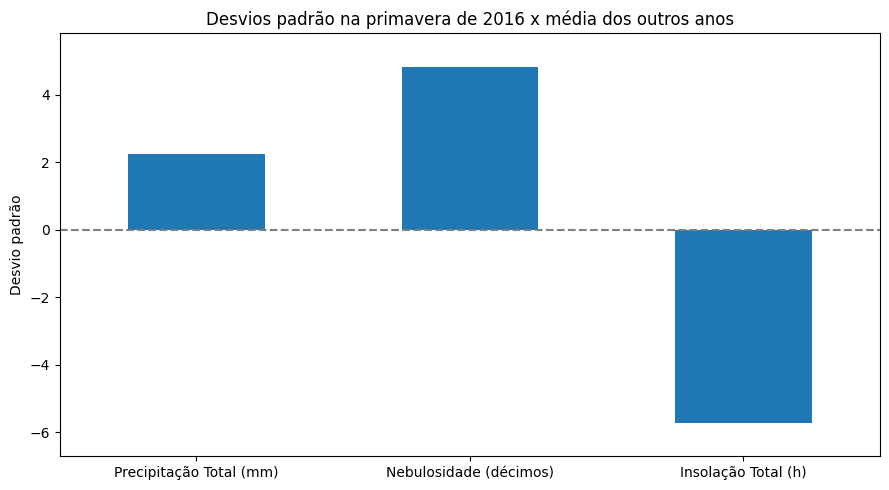

In [255]:
plt.figure(figsize=(9, 5))

z_scores_2016.plot(kind='bar', title='Desvios padrão na primavera de 2016 x média dos outros anos')

plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Desvio padrão')
plt.xticks(rotation=360)
plt.ylim(z_scores_2016.min() - 1, z_scores_2016.max() + 1)
plt.tight_layout()
plt.show()

## Clima e produção

A análise das variáveis climáticas foi conduzida com o intuito de compreender como o clima influencia a produção de uvas destinadas à vinificação. Como a videira passa por diferentes fases ao longo do ano, é essencial observar os efeitos do clima em períodos específicos do ciclo produtivo, que são particularmente sensíveis às variações climáticas:

**Primavera** (Setembro a Novembro)
Esse período marca as fases iniciais do desenvolvimento da videira, especialmente a brotação e a floração. Nessa fase:

Chuvas excessivas e alta nebulosidade podem prejudicar a formação adequada dos cachos, impactando negativamente a produção.

Temperaturas mínimas e médias são particularmente relevantes, pois influenciam o sucesso das etapas iniciais do ciclo da planta.

In [256]:
df_producao_primavera = df_primaveras[['PRECIPITACAO_TOTAL_MM', 
                                       'NEBULOSIDADE_MEDIA_DECIMOS', 
                                       'INSOLACAO_TOTAL_H', 
                                       'TEMP_MIN_MEDIA_C', 
                                       'TEMP_MEDIA_COMP_C']].join(df_producao, how='inner')

In [257]:
labels_legiveis = {
    'INSOLACAO_TOTAL_H': 'Insolação Total (h)',
    'NEBULOSIDADE_MEDIA_DECIMOS': 'Nebulosidade (décimos)',
    'PRECIPITACAO_TOTAL_MM': 'Precipitação Total (mm)',
    'TEMP_MAX_MEDIA_C': 'Temp. Máxima Média (°C)',
    'TEMP_MEDIA_COMP_C': 'Temp. Média Comp. (°C)',
    'TEMP_MIN_MEDIA_C': 'Temp. Mínima Média (°C)',
    'UMIDADE_MEDIA_PCT': 'Umidade Média (%)'
}

5.5 Correlação entre variáveis climáticas e produção de vinho (Primavera)

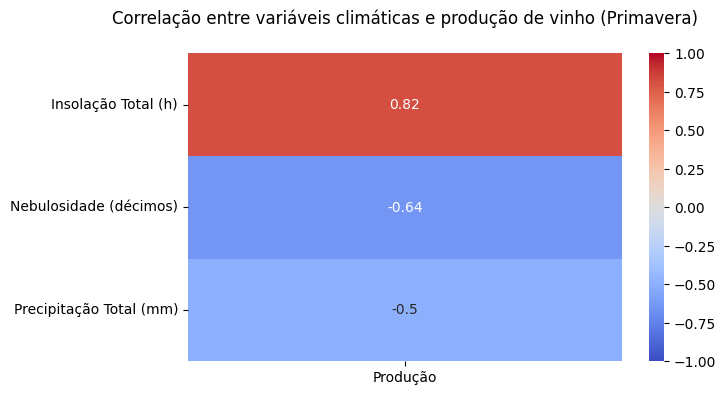

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas as variáveis desejadas
variaveis_desejadas = ['Insolação Total (h)', 'Nebulosidade (décimos)', 'Precipitação Total (mm)']

# Matriz de correlação
corr = df_producao_primavera.corr()

# Renomeia os índices para variáveis legíveis
corr_legivel = corr.rename(index=labels_legiveis, columns=labels_legiveis)

# Filtra apenas as variáveis desejadas
corr_filtrada = corr_legivel.loc[variaveis_desejadas, ['PRODUCAO']]

# Visualiza a correlação com um heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(
    corr_filtrada,
    annot=True,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    yticklabels=True,
    xticklabels=['Produção']
)
plt.title('Correlação entre variáveis climáticas e produção de vinho (Primavera)\n')
plt.show()
